### Objective of the Assignment
#### There are three main Objective into consideration.
#### 1) Finding the top 5 feature which helps in predicting the demand for shared bikes.
#### 2) Finding the multilinear equation.
#### 3) Calulate the R-sqaured score on the test data set to evaluate model

In [729]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [730]:
pd.set_option('display.max_columns',500)

#### Reading the dataset from CSV 

In [731]:
df=pd.read_csv('C:\ML and AI Course\Course_3_Module1\Machine Learning 1\Linear Regression Assignment\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Analysing the dataset 

In [732]:
df.shape

(730, 16)

In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [734]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### As 'cnt' is the target variable and it is created by the addition of 'casual' and 'registered' column, so droping 'casual' and 'registered' column as they are redundant.

#### In the dataset, we have  yr,month,day infomation in seperate column so 'dteday' is redundant column and can be removed. 'instant' column also can be dropped as it is used as unique key.

In [735]:
df=df.drop(['casual','registered','dteday','instant','dteday'],axis=1)

#### Plotting the pairplot on numerical columns for analysing the data

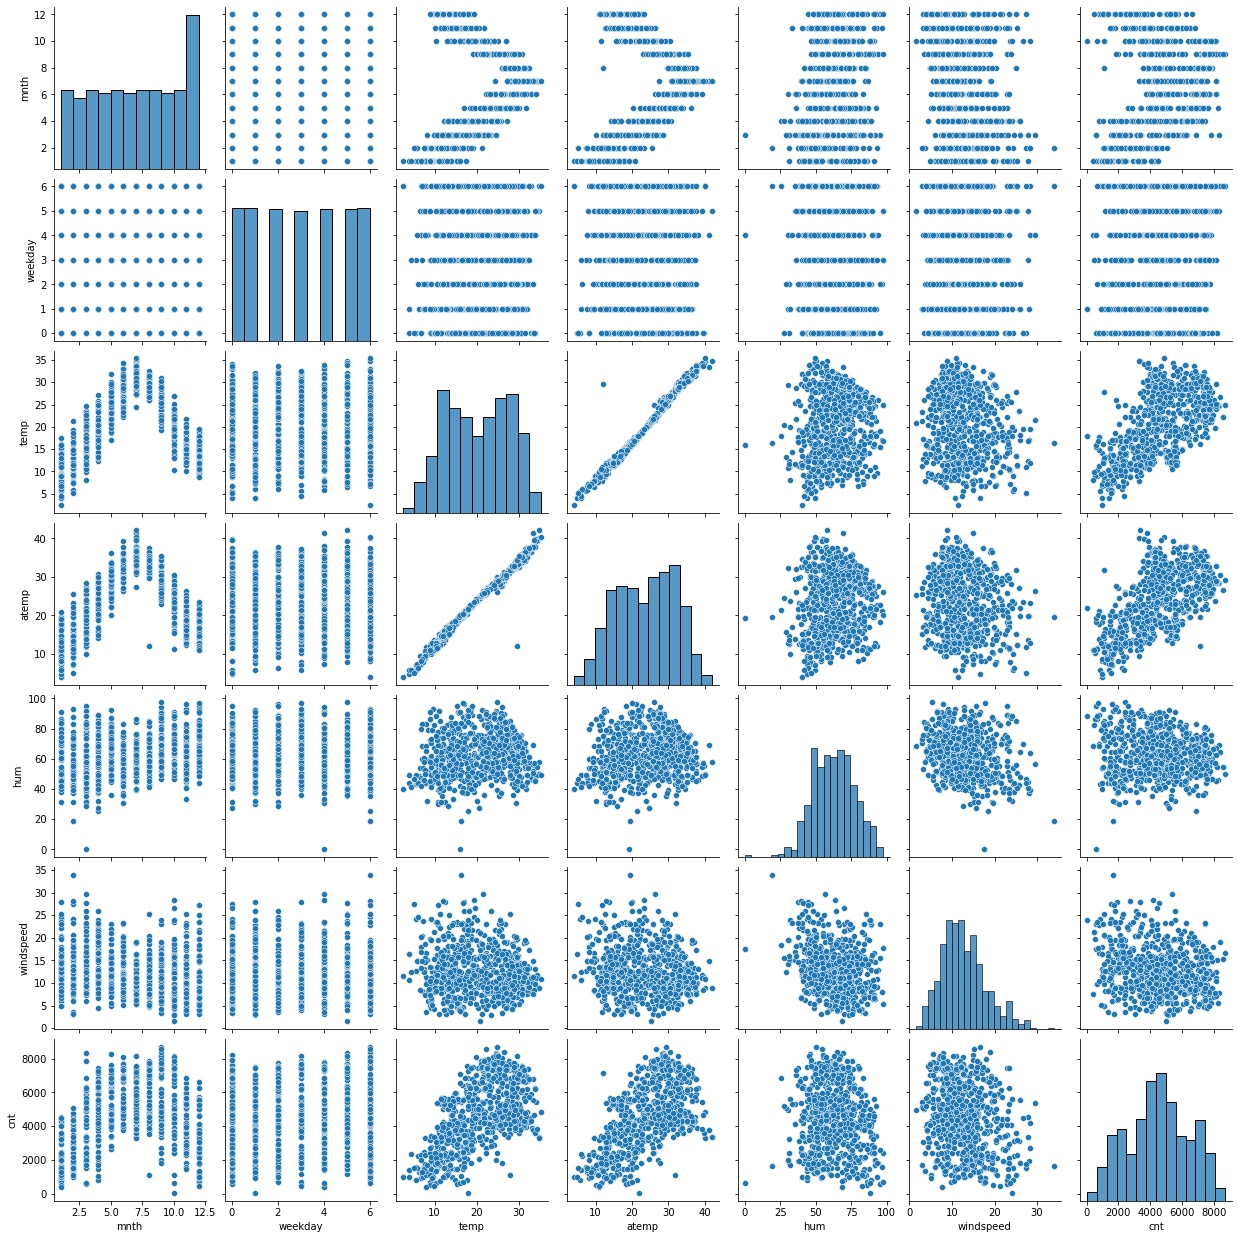

In [736]:
sns.pairplot(df[['mnth','weekday','temp','atemp','hum','windspeed','cnt']])

#### From above pairplot, we can see there is strong correlation between temp and atemp, and there is correlation between cnt and (temp,atemp,month)
#### There are relation between cnt and other feature but its not very clear and need further analysis.

<AxesSubplot:xlabel='cnt', ylabel='Density'>

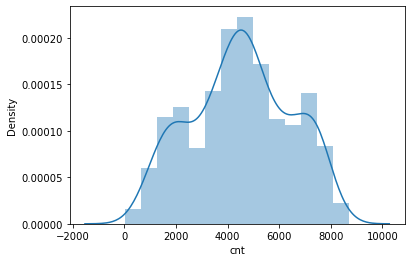

In [737]:
sns.distplot(df.cnt)

#### From above plot, we can see that the cnt is normally distributed.
#### Below , categorical variable are analysed using boxplot

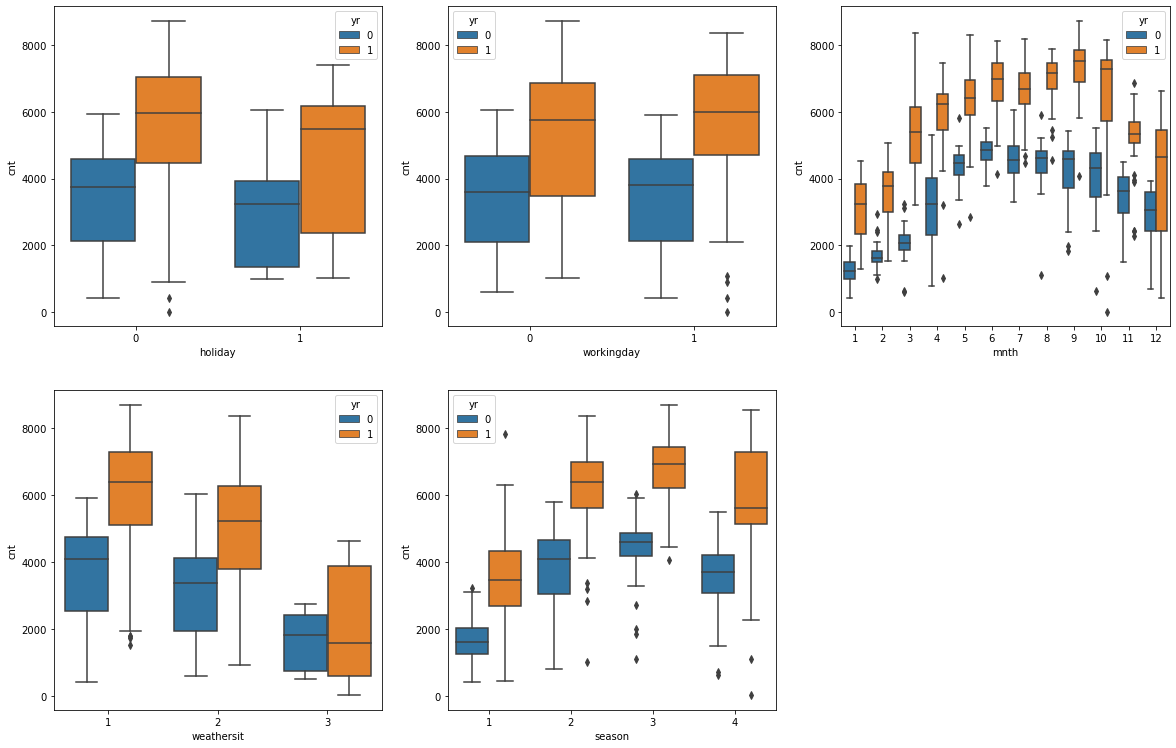

In [738]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='holiday',y='cnt',hue='yr',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='workingday',y='cnt',hue='yr',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',hue='yr',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',hue='yr',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='season',hue='yr',y='cnt',data=df)
plt.show()

#### From the above boxplot, it is clear that in year 2019 there were more business and if consider individual feature also then 'cnt' is more in 2019.
#### 'Holiday','workingday' don't have significant affect on 'cnt' but customer count have dependency on month,weather situation and season. Lets investigate further. It can be also observer thet there no significant outlier in the dataset.

#### Creating dummy variable below from the categorical variable. Concatinating in the main dataframe and dropping the variable from where these dummies variable are generated.

In [739]:
df_month=pd.get_dummies(df['mnth'], prefix='month', prefix_sep='',drop_first=True)
df_weekday=pd.get_dummies(df['weekday'], prefix='weekday', prefix_sep='',drop_first=True)
df_season=pd.get_dummies(df['season'], prefix='season', prefix_sep='',drop_first=True)
df_weathersit=pd.get_dummies(df['weathersit'], prefix='weathersit', prefix_sep='',drop_first=True)
df_season

,season2,season3,season4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [740]:
df=pd.concat([df,df_month,df_weekday,df_season,df_weathersit],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,season2,season3,season4,weathersit2,weathersit3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [741]:
df=df.drop(['mnth','weekday','season','weathersit'],axis=1)
df.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,season2,season3,season4,weathersit2,weathersit3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### Spliting the data into train(70%) and test(30%) set using sklearn 

In [742]:
import sklearn 
from sklearn.model_selection import train_test_split

In [743]:
df_train,df_test=train_test_split(df,train_size=.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [744]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,season2,season3,season4,weathersit2,weathersit3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [745]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           510 non-null    int64  
 1   holiday      510 non-null    int64  
 2   workingday   510 non-null    int64  
 3   temp         510 non-null    float64
 4   atemp        510 non-null    float64
 5   hum          510 non-null    float64
 6   windspeed    510 non-null    float64
 7   cnt          510 non-null    int64  
 8   month2       510 non-null    uint8  
 9   month3       510 non-null    uint8  
 10  month4       510 non-null    uint8  
 11  month5       510 non-null    uint8  
 12  month6       510 non-null    uint8  
 13  month7       510 non-null    uint8  
 14  month8       510 non-null    uint8  
 15  month9       510 non-null    uint8  
 16  month10      510 non-null    uint8  
 17  month11      510 non-null    uint8  
 18  month12      510 non-null    uint8  
 19  weekda

#### Normalizing the data of 'temp','atemp','hum','windspeed','cnt' using MinMax Scaler

In [746]:
from sklearn.preprocessing import MinMaxScaler

In [747]:
Scaler=MinMaxScaler()

In [748]:
num_var=['temp','atemp','hum','windspeed','cnt']

#### Analyzing the normalized data

In [749]:
df_train[num_var]=Scaler.fit_transform(df_train[num_var])
df_train[num_var]

,temp,atemp,hum,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095
...,...,...,...,...,...
578,0.863973,0.824359,0.679690,0.187140,0.832835
53,0.202618,0.218747,0.435939,0.111379,0.218017
350,0.248216,0.223544,0.577930,0.431816,0.312586
79,0.462664,0.434043,0.759870,0.529881,0.236424


In [750]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,season2,season3,season4,weathersit2,weathersit3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.247059,0.262745,0.247059,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.431725,0.440557,0.431725,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Creating heatmap and analysing the correlation between variables

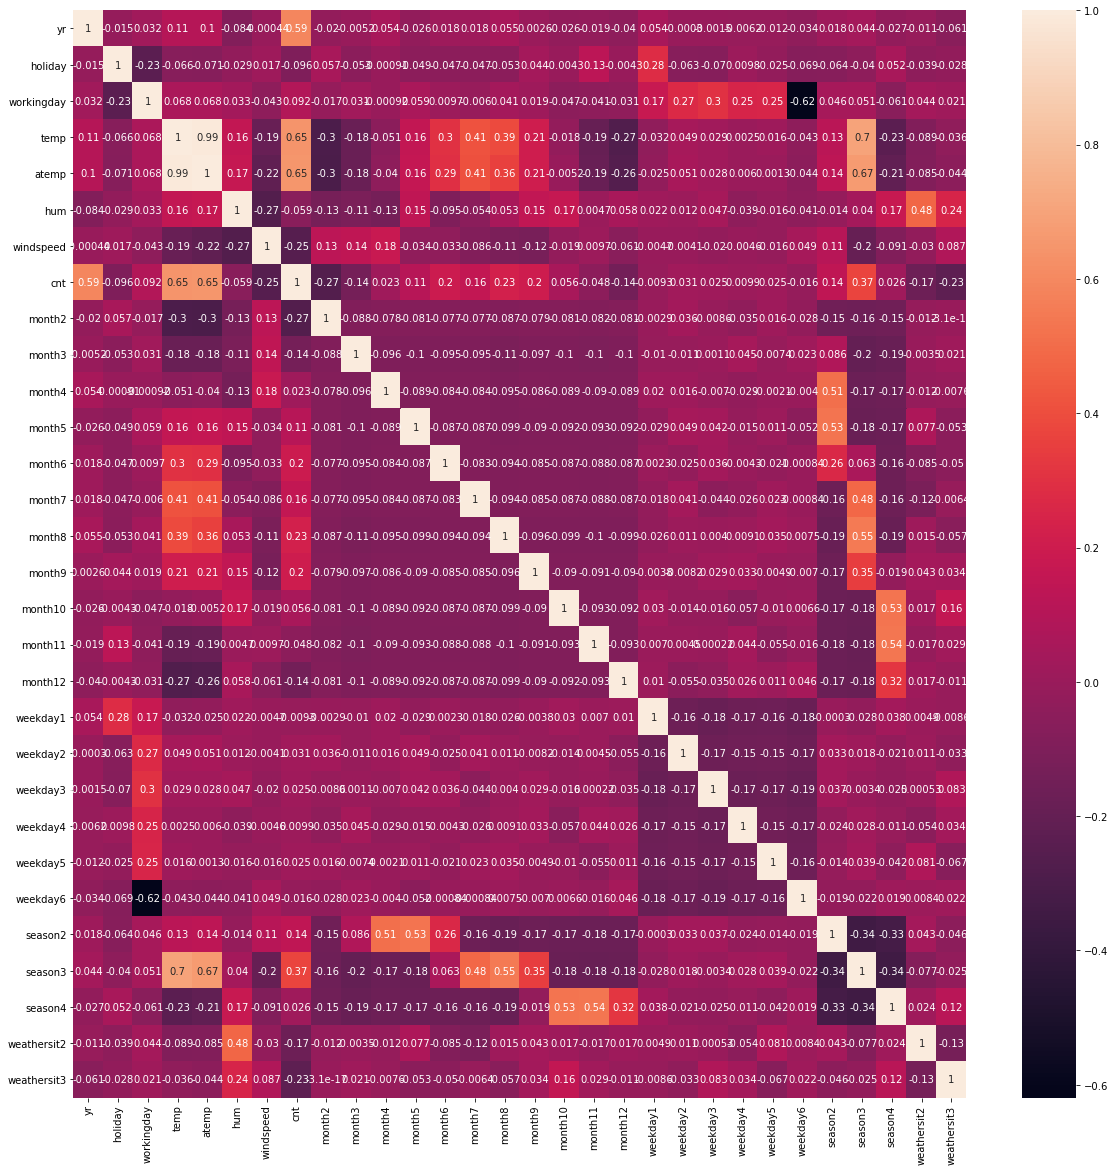

In [660]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

#### From above heatmap, we can see that there is strong correlation between temp and atemp. One column can be dropped but I am not droping here. I will check pvalue and VIF then drop.

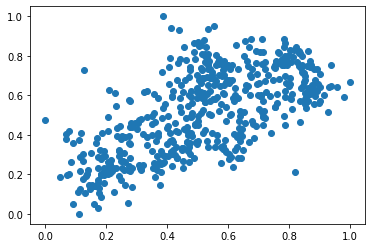

In [751]:
plt.scatter(x='cnt',y='atemp',data=df_train)

#### From the above we can see the 'cnt' have strong correlation with 'Temp' and 'yr'. Let's check it on scatter plot too.

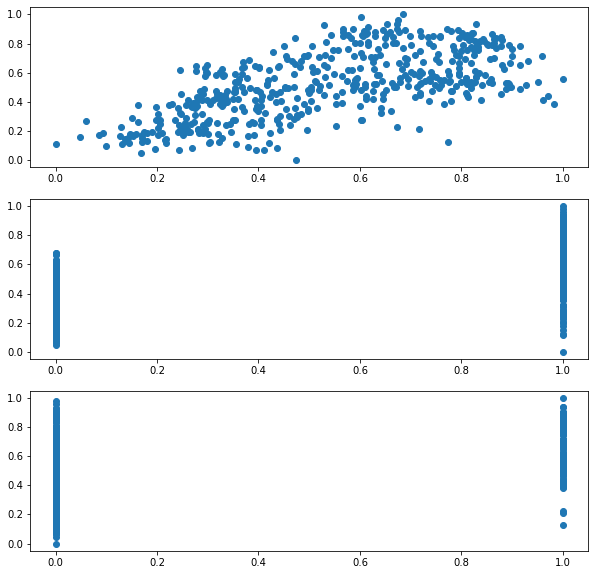

In [752]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.scatter(x='temp',y='cnt',data=df_train)
plt.subplot(3,1,2)
plt.scatter(x='yr',y='cnt',data=df_train)
plt.subplot(3,1,3)
plt.scatter(x='season3',y='cnt',data=df_train)
plt.show()

#### I will use Automated as well as manual approach for feature selection. First I will select top 10 feature using RFE then I will select top 5 feature using manual approach.

#### Creating X and Y variable for the train set

In [753]:
y_train = df_train.pop('cnt')

In [754]:
X_train = df_train

#### Building model using RFE

In [755]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [756]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [757]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('month2', False, 12),
 ('month3', False, 7),
 ('month4', False, 9),
 ('month5', False, 8),
 ('month6', False, 10),
 ('month7', False, 13),
 ('month8', True, 1),
 ('month9', True, 1),
 ('month10', False, 5),
 ('month11', False, 14),
 ('month12', False, 15),
 ('weekday1', False, 16),
 ('weekday2', False, 17),
 ('weekday3', False, 19),
 ('weekday4', False, 20),
 ('weekday5', False, 18),
 ('weekday6', False, 3),
 ('season2', True, 1),
 ('season3', False, 6),
 ('season4', True, 1),
 ('weathersit2', False, 2),
 ('weathersit3', True, 1)]

In [758]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'month8', 'month9',
       'season2', 'season4', 'weathersit3'],
      dtype='object')

#### From above list, we  get Top 10 feature
#### Now further manually analyse with Statsmodel. 

In [759]:
X_train_top10=X_train[col]

In [760]:
import statsmodels.api as sm
X_train_top10=sm.add_constant(X_train_top10)
X_train_top10.head(3)

,const,yr,holiday,temp,hum,windspeed,month8,month9,season2,season4,weathersit3
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0


In [761]:
lr=sm.OLS(y_train,X_train_top10).fit()

In [762]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.02e-186
Time:                        22:31:23   Log-Likelihood:                 495.21
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     499   BIC:                            -921.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2755      0.026     10.547      0.000       0.224       0.327
yr              0.2264      0.008     27.262      0.000       0.210       0.243
holiday        -0.0893      0.026     -3.409      0.001      -0.141      -0.038
temp            0.5660      0.022     25.833      0.000       0.523       0.609
hum            -0.2848      0.032     -9.026      0.000      -0.347      -0.223
windspeed      -0.2012      0.026     -7.729      0.000      -0.252      -0.150
month8          0.0496      0.017      2.973      0.003       0.017       0.082
month9          0.1190      0.017      7.174      0.000       0.086       0.152
season2         0.1011      0.011      9.084      0.000       0.079       0.123
season4         0.1508      0.011     13.840      0.000       0.129       0.172
weathersit3    -0.1916      0.026     -7.496      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       56.891   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.867
Skew:                          -0.673   Prob(JB):                     1.03e-23
Kurtosis:                       4.781   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### With 10 variables, the R-squared=.83 and Adj. R-squared:	0.83.
#### We can see that the p-value for all variables are less then 0.005. So can't decide aything from this as R-squared is also >70 and pvalue is also less. Need to check VIF of the variables

### Calculating the VIF now
#### Dropping the constant before calculating VIF

In [763]:
X_train_top10 = X_train_top10.drop(['const'], axis=1)

In [764]:
VIF=pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [765]:
VIF['Features']=X_train_top10.columns
VIF['VIF']= [round(variance_inflation_factor(X_train_top10.values, i),2) for i in range(X_train_top10.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
3,hum,10.02
2,temp,8.52
4,windspeed,3.57
0,yr,2.01
7,season2,1.82
8,season4,1.73
5,month8,1.57
6,month9,1.30
9,weathersit3,1.09
1,holiday,1.04


#### From above VIF list, dropping 'hum' feature as its VIF>5 and rebuild model

In [766]:
X_train_top9 = X_train_top10.drop(['hum'], axis=1)

In [767]:
X_train_top9=sm.add_constant(X_train_top9)
lr=sm.OLS(y_train,X_train_top9).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.39e-171
Time:                        22:31:28   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0900      0.017      5.181      0.000       0.056       0.124
yr              0.2332      0.009     26.169      0.000       0.216       0.251
holiday        -0.0848      0.028     -3.005      0.003      -0.140      -0.029
temp            0.5464      0.023     23.262      0.000       0.500       0.593
windspeed      -0.1427      0.027     -5.252      0.000      -0.196      -0.089
month8          0.0394      0.018      2.196      0.029       0.004       0.075
month9          0.1002      0.018      5.650      0.000       0.065       0.135
season2         0.0905      0.012      7.588      0.000       0.067       0.114
season4         0.1316      0.012     11.430      0.000       0.109       0.154
weathersit3    -0.2520      0.027     -9.483      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       63.117   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.174
Skew:                          -0.757   Prob(JB):                     7.23e-25
Kurtosis:                       4.714   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### After droping hummidity, we can see that R-squared decrease significantly but well above 70%  of threshold. Lets check if VIF of other variable got changed or not.

In [768]:
X_train_top9 = X_train_top9.drop(['const'], axis=1)
VIF=pd.DataFrame()
VIF['Features']=X_train_top9.columns
VIF['VIF']= [round(variance_inflation_factor(X_train_top9.values, i),2) for i in range(X_train_top9.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
6,season2,1.79
4,month8,1.57
7,season4,1.44
5,month9,1.29
8,weathersit3,1.06
1,holiday,1.04


#### VIF of variable changed now and for all variable , VIF<5 now

#### From the above statsistic we can see that the p-value of month8 = 0.029. So lets drop month8 and analyze after rebuilding model

In [769]:
X_train_top8 = X_train_top9.drop(['month8'], axis=1)
X_train_top8=sm.add_constant(X_train_top8)
lr=sm.OLS(y_train,X_train_top8).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.22e-172
Time:                        22:31:30   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0875      0.017      5.029      0.000       0.053       0.122
yr              0.2334      0.009     26.093      0.000       0.216       0.251
holiday        -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp            0.5682      0.021     26.580      0.000       0.526       0.610
windspeed      -0.1455      0.027     -5.340      0.000      -0.199      -0.092
month9          0.0895      0.017      5.229      0.000       0.056       0.123
season2         0.0812      0.011      7.256      0.000       0.059       0.103
season4         0.1261      0.011     11.179      0.000       0.104       0.148
weathersit3    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [770]:
X_train_top8 = X_train_top8.drop(['const'], axis=1)
VIF=pd.DataFrame()
VIF['Features']=X_train_top8.columns
VIF['VIF']= [round(variance_inflation_factor(X_train_top8.values, i),2) for i in range(X_train_top8.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
5,season2,1.55
6,season4,1.34
4,month9,1.20
7,weathersit3,1.06
1,holiday,1.03


#### From above two output, we can see that droping month8 variable doesn't have significant changs in R-squared=.80 and  Adj. R-squared=.80 
#### VIF are also controlled . So we can say Aug month from top 5 feature list.

#### Lets analyse by dropping Holiday feature

In [771]:
X_train_top7 = X_train_top8.drop(['holiday'], axis=1)
X_train_top7=sm.add_constant(X_train_top7)
lr=sm.OLS(y_train,X_train_top7).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     287.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.34e-171
Time:                        22:31:31   Log-Likelihood:                 449.48
No. Observations:                 510   AIC:                            -883.0
Df Residuals:                     502   BIC:                            -849.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0839      0.018      4.790      0.000       0.049       0.118
yr              0.2337      0.009     25.908      0.000       0.216       0.251
temp            0.5719      0.022     26.576      0.000       0.530       0.614
windspeed      -0.1474      0.027     -5.366      0.000      -0.201      -0.093
month9          0.0868      0.017      5.035      0.000       0.053       0.121
season2         0.0824      0.011      7.317      0.000       0.060       0.105
season4         0.1251      0.011     11.004      0.000       0.103       0.147
weathersit3    -0.2502      0.027     -9.314      0.000      -0.303      -0.197
==============================================================================
Omnibus:                       64.591   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.216
Skew:                          -0.778   Prob(JB):                     4.29e-25
Kurtosis:                       4.691   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [772]:
X_train_top7 = X_train_top7.drop(['const'], axis=1)
VIF=pd.DataFrame()
VIF['Features']=X_train_top7.columns
VIF['VIF']= [round(variance_inflation_factor(X_train_top7.values, i),2) for i in range(X_train_top7.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
1,temp,3.63
2,windspeed,2.95
0,yr,2.00
4,season2,1.55
5,season4,1.34
3,month9,1.19
6,weathersit3,1.06


#### Again from above two output, we can see that droping holiday variable doesn't have significant changs in R-squared=.80 and  Adj. R-squared=.80 (Same as above). So we can exclude holiday also from top5 feature list.
#### Now we have left with 7 variable. Let's continue to check others

#### Dropping weathersit3 feature and rebuilding model

In [773]:
X_train_top6 = X_train_top7.drop(['weathersit3'], axis=1)
X_train_top6=sm.add_constant(X_train_top6)
lr=sm.OLS(y_train,X_train_top6).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     273.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.60e-155
Time:                        22:31:32   Log-Likelihood:                 408.83
No. Observations:                 510   AIC:                            -803.7
Df Residuals:                     503   BIC:                            -774.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0869      0.019      4.591      0.000       0.050       0.124
yr             0.2386      0.010     24.496      0.000       0.219       0.258
temp           0.5699      0.023     24.479      0.000       0.524       0.616
windspeed     -0.1739      0.030     -5.886      0.000      -0.232      -0.116
month9         0.0797      0.019      4.278      0.000       0.043       0.116
season2        0.0834      0.012      6.840      0.000       0.059       0.107
season4        0.1129      0.012      9.245      0.000       0.089       0.137
==============================================================================
Omnibus:                      102.954   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.418
Skew:                          -1.035   Prob(JB):                     8.42e-54
Kurtosis:                       5.686   Cond. No.                         9.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From above stats, we can see that R-Squared and Adj R-squared decrease by approx 3.3% which is significant drop,So we can't remove weathersit3.

#### Dropping month9 feature and rebuilding model

In [774]:
X_train_top6 = X_train_top7.drop(['month9'], axis=1)
X_train_top6=sm.add_constant(X_train_top6)
lr=sm.OLS(y_train,X_train_top6).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     315.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.54e-167
Time:                        22:31:33   Log-Likelihood:                 436.92
No. Observations:                 510   AIC:                            -859.8
Df Residuals:                     503   BIC:                            -830.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0855      0.018      4.770      0.000       0.050       0.121
yr              0.2330      0.009     25.228      0.000       0.215       0.251
temp            0.5941      0.022     27.546      0.000       0.552       0.636
windspeed      -0.1568      0.028     -5.589      0.000      -0.212      -0.102
season2         0.0714      0.011      6.310      0.000       0.049       0.094
season4         0.1225      0.012     10.537      0.000       0.100       0.145
weathersit3    -0.2443      0.027     -8.888      0.000      -0.298      -0.190
==============================================================================
Omnibus:                       54.902   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.581
Skew:                          -0.631   Prob(JB):                     2.64e-24
Kurtosis:                       4.875   Cond. No.                         9.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [775]:
X_train_top6 = X_train_top6.drop(['const'], axis=1)
VIF=pd.DataFrame()
VIF['Features']=X_train_top6.columns
VIF['VIF']= [round(variance_inflation_factor(X_train_top6.values, i),2) for i in range(X_train_top6.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
1,temp,3.25
2,windspeed,2.93
0,yr,2.00
3,season2,1.49
4,season4,1.34
5,weathersit3,1.06


#### From above stats, we can see that R-Squared(0.79) and Adj R-squared decrease by approx 1% after droping month9 which is managable ,So we can remove month9 from top5 feature list.
#### Dropping next variable 'season4' and rebuilding the model

In [776]:
X_train_top5 = X_train_top6.drop(['season4'], axis=1)
X_train_top5=sm.add_constant(X_train_top5)
lr=sm.OLS(y_train,X_train_top5).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     292.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.97e-146
Time:                        22:31:35   Log-Likelihood:                 386.06
No. Observations:                 510   AIC:                            -760.1
Df Residuals:                     504   BIC:                            -734.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1610      0.018      8.880      0.000       0.125       0.197
yr              0.2338      0.010     22.936      0.000       0.214       0.254
temp            0.5436      0.023     23.420      0.000       0.498       0.589
windspeed      -0.1907      0.031     -6.200      0.000      -0.251      -0.130
season2         0.0366      0.012      3.062      0.002       0.013       0.060
weathersit3    -0.2116      0.030     -7.019      0.000      -0.271      -0.152
==============================================================================
Omnibus:                        9.866   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.584
Skew:                          -0.271   Prob(JB):                      0.00503
Kurtosis:                       3.453   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### After dropping 'season4', we can see a significant drop of 4.5% in R-square(0.74) value so we will not drop it.
#### Now, droping 'season2' and rebuild model

In [777]:
X_train_top5 = X_train_top6.drop(['season2'], axis=1)
X_train_top5=sm.add_constant(X_train_top5)
lr=sm.OLS(y_train,X_train_top5).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     344.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.71e-160
Time:                        22:31:36   Log-Likelihood:                 417.50
No. Observations:                 510   AIC:                            -823.0
Df Residuals:                     504   BIC:                            -797.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0974      0.018      5.263      0.000       0.061       0.134
yr              0.2330      0.010     24.317      0.000       0.214       0.252
temp            0.6041      0.022     27.065      0.000       0.560       0.648
windspeed      -0.1389      0.029     -4.796      0.000      -0.196      -0.082
season4         0.1011      0.012      8.760      0.000       0.078       0.124
weathersit3    -0.2474      0.029     -8.675      0.000      -0.303      -0.191
==============================================================================
Omnibus:                       39.008   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.530
Skew:                          -0.522   Prob(JB):                     9.72e-15
Kurtosis:                       4.395   Cond. No.                         9.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### After dropping 'season2', we can see a slight drop of 1.07% in R-square value(0.773) so we will not drop it.
#### We have two option, drop season2 and we will get top5 feature or we can try dropping other feature in place of season2, to be very sure.
#### Lets try dropping 'windspeed' and rebuild model

In [778]:
X_train_top5 = X_train_top6.drop(['windspeed'], axis=1)
X_train_top5=sm.add_constant(X_train_top5)
lr=sm.OLS(y_train,X_train_top5).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     351.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.23e-161
Time:                        22:31:38   Log-Likelihood:                 421.55
No. Observations:                 510   AIC:                            -831.1
Df Residuals:                     504   BIC:                            -805.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0216      0.014      1.520      0.129      -0.006       0.050
yr              0.2316      0.010     24.371      0.000       0.213       0.250
temp            0.6210      0.022     28.685      0.000       0.578       0.663
season2         0.0650      0.012      5.609      0.000       0.042       0.088
season4         0.1300      0.012     10.929      0.000       0.107       0.153
weathersit3    -0.2598      0.028     -9.230      0.000      -0.315      -0.205
==============================================================================
Omnibus:                       56.390   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.751
Skew:                          -0.659   Prob(JB):                     4.00e-24
Kurtosis:                       4.826   Cond. No.                         7.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [779]:
X_train_top5 = X_train_top5.drop(['const'], axis=1)
VIF=pd.DataFrame()
VIF['Features']=X_train_top5.columns
VIF['VIF']= [round(variance_inflation_factor(X_train_top5.values, i),2) for i in range(X_train_top5.shape[1])]
VIF.sort_values(by='VIF',ascending=False)

,Features,VIF
1,temp,2.41
0,yr,1.93
2,season2,1.42
3,season4,1.28
4,weathersit3,1.04


#### From above stats, we can see that the R-squared (0.78) imporve if we drop 'windspeed' instaed of 'season2'. So we will drop 'windspeed' 
##### Finally we got the top5 feature, i.e 'yr', 'temp', 'season2', 'season4', 'weathersit3' and the final  R-squared on train data is (0.78)

## Residual Analysis and Prediction
#### Now computing predicted value on train data below

In [780]:
X_train_top5=sm.add_constant(X_train_top5)

In [781]:
X_train_top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        510 non-null    float64
 1   yr           510 non-null    int64  
 2   temp         510 non-null    float64
 3   season2      510 non-null    uint8  
 4   season4      510 non-null    uint8  
 5   weathersit3  510 non-null    uint8  
dtypes: float64(2), int64(1), uint8(3)
memory usage: 17.4 KB


In [782]:
X_train_top5

,const,yr,temp,season2,season4,weathersit3
576,1.0,1,0.815169,0,0,0
426,1.0,1,0.442393,0,0,0
728,1.0,1,0.245101,0,0,0
482,1.0,1,0.395666,1,0,0
111,1.0,0,0.345824,1,0,0
...,...,...,...,...,...,...
578,1.0,1,0.863973,0,0,0
53,1.0,0,0.202618,0,0,0
350,1.0,0,0.248216,0,1,0
79,1.0,0,0.462664,1,0,0


In [783]:
y_train_pred.shape

(510,)

<AxesSubplot:ylabel='Density'>

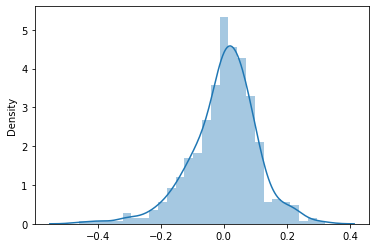

In [784]:
y_train_pred=lr.predict(X_train_top5)
residual=y_train-y_train_pred
sns.distplot(residual)

#### From above plot we can see normal distribution of resdiual.

In [785]:
top5_feature=X_train_top5.columns
top5_feature=top5_feature.drop('const')
top5_feature

Index(['yr', 'temp', 'season2', 'season4', 'weathersit3'], dtype='object')

#### Prediction and Inference on test dataset

In [786]:
num_var=['temp','atemp','hum','windspeed','cnt']

In [787]:
df_test[num_var]

,temp,atemp,hum,windspeed,cnt
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659
221,31.433347,34.24915,42.4167,13.417286,4780
152,29.315000,32.19710,30.5000,19.583229,4968
...,...,...,...,...,...
702,19.509153,23.45270,73.3750,11.666643,6606
127,21.661653,25.94665,63.1667,5.000712,4333
640,26.957500,29.95665,79.3750,4.458569,7572
72,13.333897,16.60000,49.6957,9.174042,2046


#### Normalizing Test Data set

In [788]:
df_test[num_var]=Scaler.transform(df_test[num_var])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,season2,season3,season4,weathersit2,weathersit3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.263636,0.245455,0.236364,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.441609,0.431338,0.425817,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Creating X and Y variable from the test data set

In [789]:
y_test=df_test.pop('cnt')

In [790]:
X_test=df_test

In [791]:
X_test_sm=sm.add_constant(X_test)
X_test_sm.head(3)

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,season2,season3,season4,weathersit2,weathersit3
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0


#### Building the model

In [792]:
X_test_sm=X_test_sm[top5_feature]
X_test_sm=sm.add_constant(X_test_sm)

In [793]:
y_test_pred=lr.predict(X_test_sm)

#### Evaluating model

<AxesSubplot:ylabel='Density'>

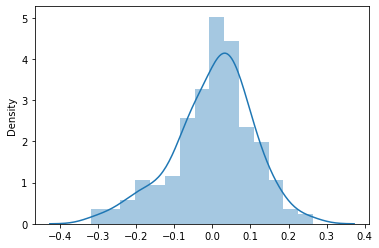

In [796]:
residual=y_test-y_test_pred
sns.distplot(residual)

In [794]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7681674493092151

#### We can see the R-square on test data is 0.77 and R-square on train data is 0.78 which is very similar. The model prediction on test set is similar to prediction on train test.

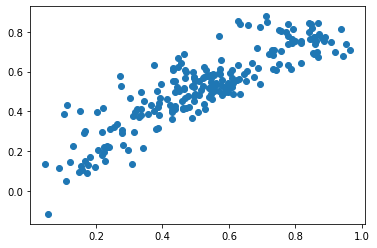

In [795]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)

#### The equation of best fitted line is
##### cnt=0.2316* yr + 0.6210* temp + 0.0650* season2 + 0.1300* season4 -0.2598* weathersit3 

### Inferances:
#### 1) As the temperature Increase, demand of bike increases and vice versa.
#### 2) In the summer and winter season, demand increase.
#### 3) In weather like 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' the demand decreases.
#### 4) In 2019, demand increase then 2018
#### 5) The R-Squared value on test data is 0.77 and R-square on train data is 0.78
#### 6) The euqation is cnt=0.2316* yr + 0.6210* temp + 0.0650* season2 + 0.1300* season4 -0.2598* weathersit3 